In [1]:
# set up
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

from sklearn import datasets
import pandas as pd

In [2]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`

    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

# Zadanie 1.

### 1.1 
Utwórz zestaw danych X składający się z 1000 wektorów dwuwymiarowych xi = (x1i,x2i).T, </br>
dla i = 1, 2, …, 1000, wygenerowanych losowo przy użyciu dwuwymiarowego </br>
rozkładu normalnego o średniej [3, 5] i macierzy kowariancji [12, 3; 3, 1]. </br>

In [3]:
mu = [3, 5]
sigma = [[12, 3], 
         [3, 1]]

X = np.random.multivariate_normal(mu, sigma, 1000)

### 1.2
Ustandaryzuj dane, tak aby średnia dla każdego z wymiarów wynosiła 0, a wariancja 1.

In [4]:
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

In [5]:
X_std.std(axis=0), X_std.mean(axis=0)

(array([1., 1.]), array([-1.72620680e-16,  3.37662537e-15]))

### 1.3
Policz macierz kowariancji S ustandaryzowanego zestawu danych X_std

In [6]:
print(np.cov(X.T))
print()
sigma_std = np.cov(X_std.T)
print(sigma_std)

[[11.94723812  2.94598367]
 [ 2.94598367  0.97295079]]

[[1.001001   0.86493934]
 [0.86493934 1.001001  ]]


In [7]:
def COV(X, Y):
    return np.sum((X - X.mean()) * (Y - Y.mean())) / len(X)

In [8]:
COV_X_Y = COV(X_std[:, 0], X_std[:, 1])
COV_X_X = COV(X_std[:, 0], X_std[:, 0])
COV_Y_Y = COV(X_std[:, 1], X_std[:, 1])
print('X_std matrix:')
print(COV_X_Y)
print(COV_X_X)
print(COV_Y_Y)

X_std matrix:
0.8640743978988894
1.0000000000000002
1.0


In [9]:
print('X matrix:')
print(COV(X[:, 0], X[:, 1]))
print(COV(X[:, 0], X[:, 0]))
print(COV(X[:, 1], X[:, 1]))

X matrix:
2.9430376822470063
11.93529087977677
0.9719778384904394


### 1.4
Wyznacz wartości własne λ1 i λ2 oraz odpowiadające im wektory własne v1 i v2 <br>
macierzy kowariancji S. Dla ustalenia notacji, wartości własne porządkujemy malejąco, <br>
tzn. λ1 > λ2. <br>
<br>
\begin{equation*} A \vec{v} = \lambda \vec{v} \end{equation*}
<br>
\begin{eqnarray*} A \vec{v} - \lambda \vec{v} = 0 \\  \Rightarrow \vec{v} (A - \lambda I) = 0, \end{eqnarray*}
<br>
\begin{equation*}  Det(A - \lambda I) = 0. \end{equation*}
<br>
\begin{equation*} Det\begin{pmatrix}cov(X, X)-\lambda&cov(X, Y)\\cov(X, Y)&cov(Y, Y)-\lambda\end{pmatrix}=0. \end{equation*}
<br>
\begin{equation*} \begin{bmatrix}cov(X, X)&cov(X, Y)\\cov(X, Y)&cov(Y, Y)\end{bmatrix} \begin{bmatrix}x_{11}\\x_{12}\end{bmatrix} = \lambda \begin{bmatrix}x_{11}\\x_{12}\end{bmatrix}\end{equation*}
<br>


In [10]:
# calculate eigenvalues
delta = (COV_X_X + COV_Y_Y) ** 2 - 4 * (COV_X_X * COV_Y_Y - COV_X_Y * COV_X_Y)
lambda_1 = ((COV_X_X + COV_Y_Y) - np.sqrt(delta)) / 2
lambda_2 = ((COV_X_X + COV_Y_Y) + np.sqrt(delta)) / 2

print(f'λ1: {lambda_1}, λ2: {lambda_2}')

λ1: 0.1359256021011107, λ2: 1.8640743978988894


In [11]:
v, w = LA.eig(sigma_std)
print(f'Eigenvectors:\n{w},\n\nEigenvalues: {v}')

Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]],

Eigenvalues: [1.86594034 0.13606166]


### 1.5
Wyznacz składowe główne zestawu danych, tzn. dla każdego punktu danych xi(0)  <br>
wyznacz punkt yi = (1/sqrt(λ1) v1.T xi(0), 1/sqrt(λ2) v2.T xi(0)).T.  <br>
Odpowiada to zrzutowaniu punktu xi (0) na osie nowego układu współrzędnych <br>
wyznaczonego przez wektory własne macierzy S i przeskalowaniu  <br>
przez pierwiastki z wartości własnych. <br>


In [12]:
# maaaaaaagic ???
X_pc = np.dot(X_std, np.dot(w, np.diag(1 / np.sqrt(v))))

### 1.6
Zrób rysunki pokazujące oryginalny zbiór danych (punkty xi), zbiór danych po standaryzacji <br>
(punkty xi (0)) i zbioru danych po przekształceniu PCA (punkty yi). <br>
Na rysunkach z punktami xi i xi (0) narysuj proste zawierające osie główne elipsy <br>
wyznaczanej przez punkty danych. <br>

In [13]:
x11 = X.mean(axis=0)[0] - mu[1] * w[0][0] * X.std(axis=0)[0]
y11 = X.mean(axis=0)[0] + mu[1] * w[0][0] * X.std(axis=0)[0]

x12 = X.mean(axis=0)[1] - mu[1] * w[0][1] * X.std(axis=0)[1]
y12 = X.mean(axis=0)[1] + mu[1] * w[0][1] * X.std(axis=0)[1]


x21 = X.mean(axis=0)[0] - mu[1] * w[1][0] * X.std(axis=0)[0]
y21 = X.mean(axis=0)[0] + mu[1] * w[1][0] * X.std(axis=0)[0]

x22 = X.mean(axis=0)[1] - mu[1] * w[1][1] * X.std(axis=0)[1]
y22 = X.mean(axis=0)[1] + mu[1] * w[1][1] * X.std(axis=0)[1]



x31 = X_std.mean(axis=0)[0] - mu[1] * w[0][0] * X_std.std(axis=0)[0]
y31 = X_std.mean(axis=0)[0] + mu[1] * w[0][0] * X_std.std(axis=0)[0]

x32 = X_std.mean(axis=0)[1] - mu[1] * w[0][1] * X_std.std(axis=0)[1]
y32 = X_std.mean(axis=0)[1] + mu[1] * w[0][1] * X_std.std(axis=0)[1]


x41 = X_std.mean(axis=0)[0] - mu[1] * w[1][0] * X_std.std(axis=0)[0]
y41 = X_std.mean(axis=0)[0] + mu[1] * w[1][0] * X_std.std(axis=0)[0]

x42 = X_std.mean(axis=0)[1] - mu[1] * w[1][1] * X_std.std(axis=0)[1]
y42 = X_std.mean(axis=0)[1] + mu[1] * w[1][1] * X_std.std(axis=0)[1]

Text(0.5, 1.0, 'X standarized')

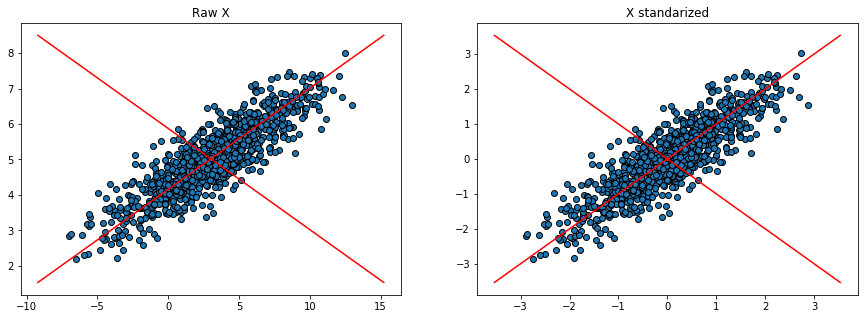

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(X[:, 0], X[:, 1], edgecolors='black')
axes[0].plot([x11, y11], [x12, y12], c='red')
axes[0].plot([x21, y21], [x22, y22], c='red')
axes[0].set_title('Raw X')

axes[1].scatter(X_std[:, 0], X_std[:, 1], edgecolors='black')
axes[1].plot([x31, y31], [x32, y32], c='red')
axes[1].plot([x41, y41], [x42, y42], c='red')
axes[1].set_title('X standarized')

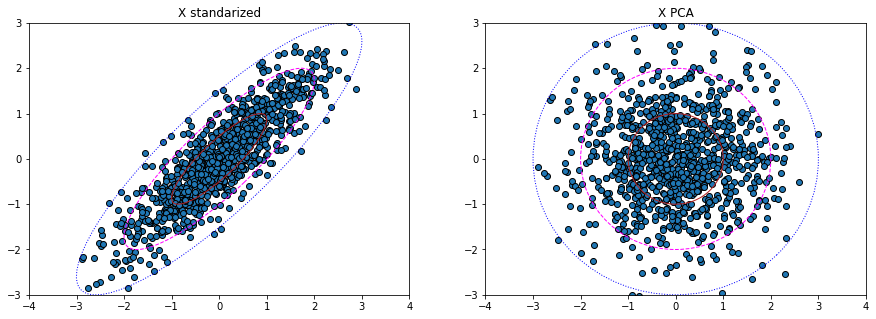

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(X_std[:, 0], X_std[:, 1], edgecolors='black')
axes[0].set_title('X standarized')
axes[0].set_xlim([-4, 4])
axes[0].set_ylim([-3, 3])

axes[1].scatter(X_pc[:, 0], X_pc[:, 1], edgecolors='black')
axes[1].set_title('X PCA')
axes[1].set_xlim([-4, 4])
axes[1].set_ylim([-3, 3])

confidence_ellipse(X_std[:, 0], X_std[:, 1], axes[0], n_std=1, edgecolor='firebrick')
confidence_ellipse(X_std[:, 0], X_std[:, 1], axes[0], n_std=2, edgecolor='fuchsia', linestyle='--')
confidence_ellipse(X_std[:, 0], X_std[:, 1], axes[0], n_std=3, edgecolor='blue', linestyle=':')

confidence_ellipse(X_pc[:, 0], X_pc[:, 1], axes[1], n_std=1, edgecolor='firebrick')
confidence_ellipse(X_pc[:, 0], X_pc[:, 1], axes[1], n_std=2, edgecolor='fuchsia', linestyle='--')
confidence_ellipse(X_pc[:, 0], X_pc[:, 1], axes[1], n_std=3, edgecolor='blue', linestyle=':')

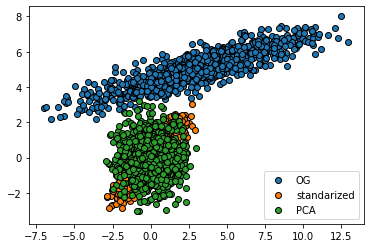

In [16]:
plt.scatter(X[:, 0], X[:, 1], edgecolors='black', label='OG')
plt.scatter(X_std[:, 0], X_std[:, 1], edgecolors='black', label='standarized')
plt.scatter(X_pc[:, 0], X_pc[:, 1], edgecolors='black', label='PCA')
plt.legend(loc = 'lower right')

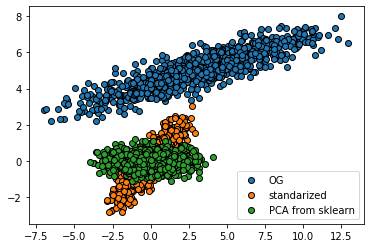

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lib = pca.fit_transform(X_std)
plt.scatter(X[:, 0], X[:, 1], edgecolors='black', label='OG')
plt.scatter(X_std[:, 0], X_std[:, 1], edgecolors='black', label='standarized')
plt.scatter(lib[:, 0], lib[:, 1], edgecolors='black', label='PCA from sklearn')
plt.legend(loc = 'lower right')

### 1.7
Sprawdź charakterystykę statystyczną (średnią, wariancję, macierz kowariancji <br>
i macierz korelacji) oryginalnego zbioru danych, zbioru danych po standaryzacji <br>
i zbioru danych po przekształceniu PCA. <br>

In [18]:
print('OG X:')
print(f'Mean: {X.mean(axis=0)}\n')
print(f'Covariance matrix:\n{np.cov(X[:, 0], X[:, 1])}\n')
print(f'Correlation matrix:\n{np.corrcoef(X[:, 0], X[:, 1])}\n')
print('--------------------------------------\n')
print('X standarized')
print(f'Mean: {X_std.mean(axis=0)}\n')
print(f'Covariance matrix:\n{np.cov(X_std[:, 0], X_std[:, 1])}\n')
print(f'Correlation matrix:\n{np.corrcoef(X_std[:, 0], X_std[:, 1])}\n')
print('--------------------------------------\n')
print('X PCA')
print(f'Mean: {X_pc.mean(axis=0)}\n')
print(f'Covariance matrix:\n{np.cov(X_pc[:, 0], X_pc[:, 1])}\n')
print(f'Correlation matrix:\n{np.corrcoef(X_pc[:, 0], X_pc[:, 1])}\n\n')

OG X:
Mean: [3.00436043 5.01488831]

Covariance matrix:
[[11.94723812  2.94598367]
 [ 2.94598367  0.97295079]]

Correlation matrix:
[[1.        0.8640744]
 [0.8640744 1.       ]]

--------------------------------------

X standarized
Mean: [-1.72620680e-16  3.37662537e-15]

Covariance matrix:
[[1.001001   0.86493934]
 [0.86493934 1.001001  ]]

Correlation matrix:
[[1.        0.8640744]
 [0.8640744 1.       ]]

--------------------------------------

X PCA
Mean: [1.63047353e-15 6.83961221e-15]

Covariance matrix:
[[1.00000000e+00 8.17942088e-17]
 [8.17942088e-17 1.00000000e+00]]

Correlation matrix:
[[1.00000000e+00 8.17942088e-17]
 [8.17942088e-17 1.00000000e+00]]




### 1.8
Wyjaśnij dlaczego licząc punkty yi dzielimy przez pierwiastki z wartości własnych. <br>
Jak wyglądałyby wyniki f) i g), gdybyśmy nie wykonywali tego dzielenia?  <br>

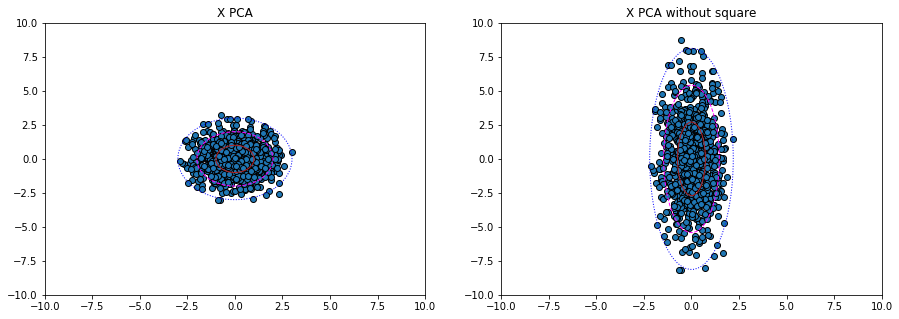

In [44]:
X_pc_nosqrt = np.dot(X_std, np.dot(w, np.diag(1 / v)))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(X_pc[:, 0], X_pc[:, 1], edgecolors='black')
axes[0].set_title('X PCA')
axes[0].set_xlim([-10, 10])
axes[0].set_ylim([-10, 10])

axes[1].scatter(X_pc_nosqrt[:, 0], X_pc_nosqrt[:, 1], edgecolors='black')
axes[1].set_title('X PCA without square')
axes[1].set_xlim([-10, 10])
axes[1].set_ylim([-10, 10])

confidence_ellipse(X_pc[:, 0], X_pc[:, 1], axes[0], n_std=1, edgecolor='firebrick')
confidence_ellipse(X_pc[:, 0], X_pc[:, 1], axes[0], n_std=2, edgecolor='fuchsia', linestyle='--')
confidence_ellipse(X_pc[:, 0], X_pc[:, 1], axes[0], n_std=3, edgecolor='blue', linestyle=':')

confidence_ellipse(X_pc_nosqrt[:, 0], X_pc_nosqrt[:, 1], axes[1], n_std=1, edgecolor='firebrick')
confidence_ellipse(X_pc_nosqrt[:, 0], X_pc_nosqrt[:, 1], axes[1], n_std=2, edgecolor='fuchsia', linestyle='--')
confidence_ellipse(X_pc_nosqrt[:, 0], X_pc_nosqrt[:, 1], axes[1], n_std=3, edgecolor='blue', linestyle=':')

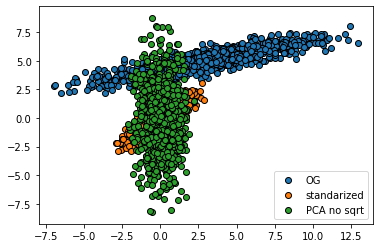

In [45]:
plt.scatter(X[:, 0], X[:, 1], edgecolors='black', label='OG')
plt.scatter(X_std[:, 0], X_std[:, 1], edgecolors='black', label='standarized')
plt.scatter(X_pc_nosqrt[:, 0], X_pc_nosqrt[:, 1], edgecolors='black', label='PCA no sqrt')
plt.legend(loc = 'lower right')

In [46]:
print('X PCA without square')
print(f'Mean: {X_pc_nosqrt.mean(axis=0)}\n')
print(f'Covariance matrix:\n{np.cov(X_pc_nosqrt[:, 0], X_pc_nosqrt[:, 1])}\n')
print(f'Correlation matrix:\n{np.corrcoef(X_pc_nosqrt[:, 0], X_pc_nosqrt[:, 1])}\n\n')

X PCA without square
Mean: [1.19359037e-15 1.84978977e-14]

Covariance matrix:
[[5.35922816e-01 3.20064295e-16]
 [3.20064295e-16 7.34960879e+00]]

Correlation matrix:
[[1.00000000e+00 1.61270152e-16]
 [1.61270152e-16 1.00000000e+00]]




### 1.9
Powtórz wszystkie powyższe obliczenia dla zestawu danych X składającego się <br>
z 1000 wektorów dwuwymiarowych xi = (x1i, x2i).T, <br>
dla i = 1, 2, …, 1000, wygenerowanych losowo przy użyciu  <br>
mieszaniny trzech rozkładów normalnych o średnich [-21, -2], [3, 5], [27, 12],  <br>
macierzy kowariancji [12, 3; 3, 1] takiej samej dla wszystkich trzech rozkładów  <br>
oraz wag równych dla wszystkich trzech rozkładów wynoszących 1/3.  <br>

In [47]:
import random
mu2 = [[-21, -2], [3, 5], [27, 12]]
sigma = [[12, 3], 
         [3, 1]]

# a)
X2 = np.array([np.random.multivariate_normal(mu2[random.randint(0, 2)], sigma) \
               for _ in range(1000)])

# b)
X2_std = (X2 - X2.mean(axis=0)) / X2.std(axis=0)

# c)
sigma_std2 = np.cov(X2_std.T)
print(f'Cov matrix:\n{sigma_std2}\n')

# d)
v2, w2 = LA.eig(sigma_std2)
print(f'Eigenvectors:\n{w2},\n\nEigenvalues: {v2}')

# e)
X_pc2 = np.dot(X2_std, np.dot(w2, np.diag(1 / np.sqrt(v2))))

Cov matrix:
[[1.001001   0.99667505]
 [0.99667505 1.001001  ]]

Eigenvectors:
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]],

Eigenvalues: [0.00432595 1.99767606]


Text(0.5, 1.0, 'X2 standarized')

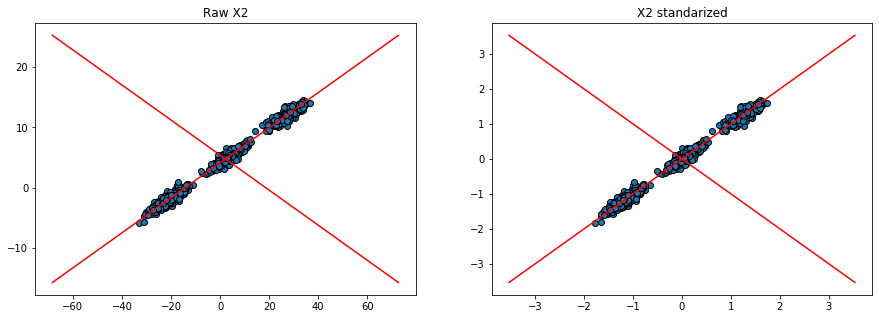

In [23]:
# f)
x11 = X2.mean(axis=0)[0] - mu[1] * w2[0][0] * X2.std(axis=0)[0]
y11 = X2.mean(axis=0)[0] + mu[1] * w2[0][0] * X2.std(axis=0)[0]

x12 = X2.mean(axis=0)[1] - mu[1] * w2[0][1] * X2.std(axis=0)[1]
y12 = X2.mean(axis=0)[1] + mu[1] * w2[0][1] * X2.std(axis=0)[1]


x21 = X2.mean(axis=0)[0] - mu[1] * w2[1][0] * X2.std(axis=0)[0]
y21 = X2.mean(axis=0)[0] + mu[1] * w2[1][0] * X2.std(axis=0)[0]

x22 = X2.mean(axis=0)[1] - mu[1] * w2[1][1] * X2.std(axis=0)[1]
y22 = X2.mean(axis=0)[1] + mu[1] * w2[1][1] * X2.std(axis=0)[1]


x31 = X2_std.mean(axis=0)[0] - mu[1] * w2[0][0] * X2_std.std(axis=0)[0]
y31 = X2_std.mean(axis=0)[0] + mu[1] * w2[0][0] * X_std.std(axis=0)[0]

x32 = X2_std.mean(axis=0)[1] - mu[1] * w2[0][1] * X2_std.std(axis=0)[1]
y32 = X2_std.mean(axis=0)[1] + mu[1] * w2[0][1] * X2_std.std(axis=0)[1]


x41 = X2_std.mean(axis=0)[0] - mu[1] * w2[1][0] * X2_std.std(axis=0)[0]
y41 = X2_std.mean(axis=0)[0] + mu[1] * w2[1][0] * X2_std.std(axis=0)[0]

x42 = X2_std.mean(axis=0)[1] - mu[1] * w2[1][1] * X2_std.std(axis=0)[1]
y42 = X2_std.mean(axis=0)[1] + mu[1] * w2[1][1] * X2_std.std(axis=0)[1]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(X2[:, 0], X2[:, 1], edgecolors='black')
axes[0].plot([x11, y11], [x12, y12], c='red')
axes[0].plot([x21, y21], [x22, y22], c='red')
axes[0].set_title('Raw X2')

axes[1].scatter(X2_std[:, 0], X2_std[:, 1], edgecolors='black')
axes[1].plot([x31, y31], [x32, y32], c='red')
axes[1].plot([x41, y41], [x42, y42], c='red')
axes[1].set_title('X2 standarized')

Text(0.5, 1.0, 'X PCA')

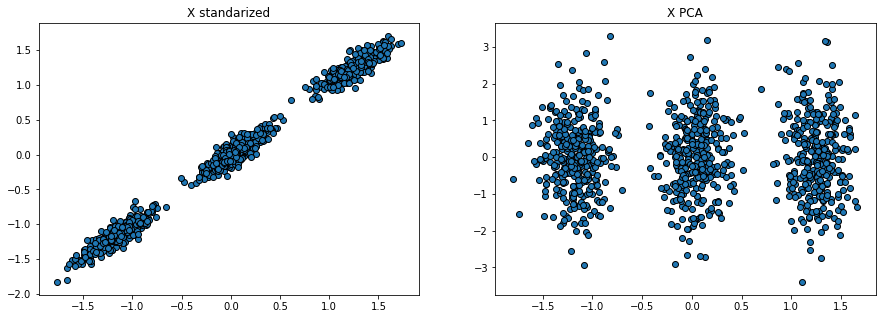

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(X2_std[:, 0], X2_std[:, 1], edgecolors='black')
axes[0].set_title('X standarized')
axes[1].scatter(X_pc2[:, 0], X_pc2[:, 1], edgecolors='black')
axes[1].set_title('X PCA')

In [25]:
# g)

print('OG X:')
print(f'Mean: {X2.mean(axis=0)}\n')
print(f'Covariance matrix:\n{np.cov(X2[:, 0], X2[:, 1])}\n')
print(f'Correlation matrix:\n{np.corrcoef(X2[:, 0], X2[:, 1])}\n')
print('--------------------------------------\n')
print('X standarized')
print(f'Mean: {X2_std.mean(axis=0)}\n')
print(f'Covariance matrix:\n{np.cov(X2_std[:, 0], X2_std[:, 1])}\n')
print(f'Correlation matrix:\n{np.corrcoef(X2_std[:, 0], X2_std[:, 1])}\n')
print('--------------------------------------\n')
print('X PCA')
print(f'Mean: {X_pc.mean(axis=0)}\n')
print(f'Covariance matrix:\n{np.cov(X_pc2[:, 0], X_pc2[:, 1])}\n')
print(f'Correlation matrix:\n{np.corrcoef(X_pc2[:, 0], X_pc2[:, 1])}\n\n')

OG X:
Mean: [2.19289064 4.75954052]

Covariance matrix:
[[397.96895751 115.24705519]
 [115.24705519  33.66057578]]

Correlation matrix:
[[1.         0.99573659]
 [0.99573659 1.        ]]

--------------------------------------

X standarized
Mean: [-3.21964677e-17  1.08069109e-15]

Covariance matrix:
[[1.001001   0.99673333]
 [0.99673333 1.001001  ]]

Correlation matrix:
[[1.         0.99573659]
 [0.99573659 1.        ]]

--------------------------------------

X PCA
Mean: [1.63047353e-15 6.83961221e-15]

Covariance matrix:
[[1.00000000e+00 7.41510068e-16]
 [7.41510068e-16 1.00000000e+00]]

Correlation matrix:
[[1.00000000e+00 7.41510068e-16]
 [7.41510068e-16 1.00000000e+00]]




# 1.10
Powtórz b), c), d) i e) dla zestawu danych IRIS. Zrób dwuwymiarowy rysunek ilustrujący <br>
zbiór danych IRIS wykreślając na osi x pierwszą składową główną y1i, a na osi y2i drugą <br>
składową główną każdego punktu xi. <br>

In [26]:
iris_df = datasets.load_iris()

iris_X = np.array(iris_df.data)
iris_Y = iris_df.target

iris_df = np.c_[np.array(iris_df.data), np.array(iris_df.target, dtype=np.int8)]
iris_df = pd.DataFrame(iris_df, columns=['a', 'b', 'c', 'd', 'target'])

In [27]:
iris_df.head()

,a,b,c,d,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [28]:
# b)
iris_X_std = (iris_X - iris_X.mean(axis=0)) / iris_X.std(axis=0)

# c)
iris_sigma_std = np.cov(iris_X_std.T)
print(f'Cov matrix:\n{iris_sigma_std}\n')

# d)
iris_v, iris_w = LA.eig(iris_sigma_std)
print(f'Eigenvectors:\n{iris_w},\n\nEigenvalues: {iris_v}')

# e)
iris_X_pc = np.dot(iris_X_std, np.dot(iris_w, np.diag(1 / np.sqrt(iris_v))))

Cov matrix:
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]

Eigenvectors:
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]],

Eigenvalues: [2.93808505 0.9201649  0.14774182 0.02085386]


Text(0.5, 1.0, 'Iris PCA')

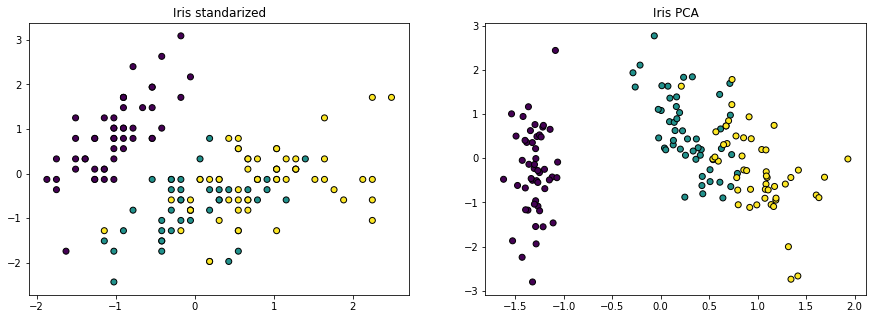

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(iris_X_std[:, 0], iris_X_std[:, 1], c=iris_Y, edgecolors='black')
axes[0].set_title('Iris standarized')
axes[1].scatter(iris_X_pc[:, 0], iris_X_pc[:, 1], c=iris_Y, edgecolors='black')
axes[1].set_title('Iris PCA')

### 1.11
Dla zestawu danych IRIS, spróbuj odtworzyć oryginalne punkty danych xi z danych <br>
zredukowanych do dwóch składowych głównych, tzn. z dwuwymiarowych punktów [y1i,y2i].T <br>
Policz średniokwadratowy błąd odtworzenia, tzn. sumę kwadratów odległości między <br>
oryginalnym punktem danych a odtworzonym punktem danych. <br>

In [30]:
iris_back = iris_X_pc * np.sqrt(iris_v)
iris_back = np.dot(iris_back, iris_w)

Text(0.5, 1.0, 'Iris standaraized')

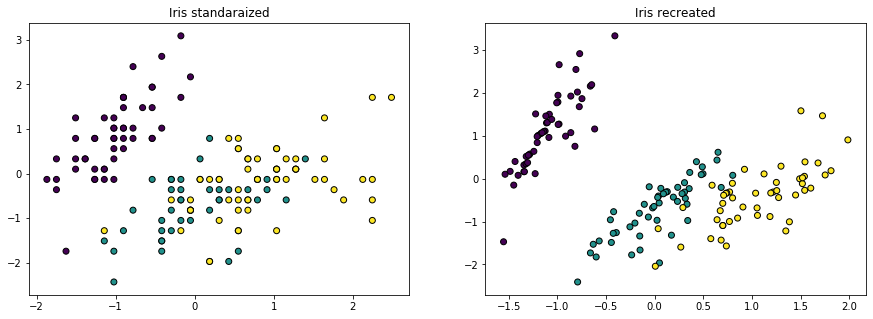

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[1].scatter(iris_back[:, 0], iris_back[:, 1], c=iris_Y, edgecolors='black')
axes[1].set_title('Iris recreated')
axes[0].scatter(iris_X_std[:, 0], iris_X_std[:, 1], c=iris_Y, edgecolors='black')
axes[0].set_title('Iris standaraized')

In [32]:
print(f'Error avg: {np.sum(np.sqrt(np.sum((iris_X_std - iris_back) ** 2, axis=1))) / iris_back.shape[0]}')

Error avg: 2.2048049622779033


# 1.12
Jakie znaczenie ma suma wartości własnych macierzy kowariancji S, <br>
które zostały użyte do konstrukcji danych zredukowanych? <br>
<br>
*The trace is the sum of eigenvalues.

In [33]:
print(f'Sum of variances: {np.sum(np.diag(sigma_std))}')

Sum of variances: 2.002002002002002


In [34]:
print(f'Sum of eigenvalues: {np.sum(v)}')

Sum of eigenvalues: 2.002002002002002


In [35]:
print(f'Sum of variances: {np.sum(np.diag(iris_sigma_std))}')

Sum of variances: 4.026845637583893


In [36]:
print(f'Sum of eigenvalues: {np.sum(iris_v)}')

Sum of eigenvalues: 4.026845637583892
